In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.cluster import MeanShift
from sklearn.cluster import MiniBatchKMeans

In [7]:
data = pd.read_csv("data/song_data.csv")

In [8]:
data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [185]:
kmeans = MiniBatchKMeans(n_clusters=75)

In [186]:
kmeans.fit(data.drop(['song_name','song_popularity','song_duration_ms','key','loudness','audio_mode','tempo','time_signature'],axis=1))

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=75, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [187]:
kmeans.cluster_centers_

array([[0.06551862, 0.8346798 , 0.53297291, 0.01355832, 0.11609212,
        0.10575517, 0.30609163],
       [0.03735924, 0.49533622, 0.79327903, 0.00843983, 0.14263466,
        0.06403293, 0.65358232],
       [0.62790154, 0.49076615, 0.54569231, 0.0088284 , 0.14475938,
        0.04999077, 0.50731692],
       [0.93778261, 0.54398068, 0.13742618, 0.89417874, 0.11141546,
        0.06073382, 0.22098937],
       [0.09243865, 0.82412375, 0.71058882, 0.00191203, 0.12375369,
        0.2503002 , 0.52924152],
       [0.06448575, 0.61254545, 0.78347727, 0.65806818, 0.60347727,
        0.06570909, 0.47006818],
       [0.6500813 , 0.59861382, 0.73978049, 0.01537337, 0.33626504,
        0.0643187 , 0.8780122 ],
       [0.57180303, 0.56692424, 0.69460606, 0.69175758, 0.22653788,
        0.06104545, 0.45387879],
       [0.04094544, 0.67762736, 0.78211792, 0.75596698, 0.15117547,
        0.07364057, 0.33520566],
       [0.03385339, 0.53106507, 0.83660274, 0.02029755, 0.34864384,
        0.10281781, 0.2

In [188]:
info = pd.read_csv("data/song_info.csv")

In [189]:
info.groupby("playlist").nunique()

,song_name,artist_name,album_names,playlist
playlist,,,,
00s Rock Anthems,60,52,57,1
100% LatinX,59,57,59,1
2000s Smash Hits,80,41,66,1
50 Latin Classics,50,49,49,1
60s Rock Anthems,100,62,92,1
...,...,...,...,...
Workout Twerkout,49,38,47,1
You & Me,100,79,86,1
Young & Free,100,91,100,1


In [190]:
df = data.to_numpy()

In [191]:
df[:,1]

array([73, 66, 76, ..., 23, 55, 60], dtype=object)

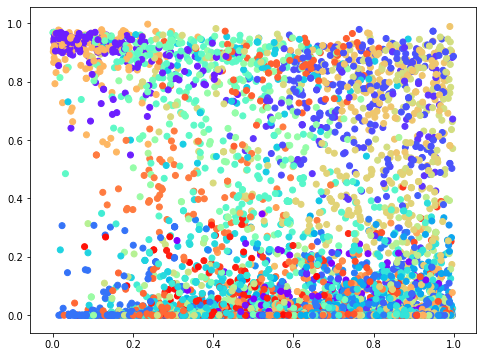

In [192]:
plt.figure(figsize=(8, 6))
plt.scatter(df[:,5], df[:,6], c=kmeans.labels_, cmap='rainbow')

In [224]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = kmeans.labels_
shotgun_georgeezra_cluster = cluster_map.iloc[18177][1]
shotgun_georgeezra_cluster

16

In [225]:
combined_data = data.join(info.drop("song_name",axis=1)).join(cluster_map.drop("data_index",axis=1)).drop_duplicates(subset=['song_name',"artist_name","song_duration_ms"],keep="last")

In [226]:
combined_data[combined_data.cluster == shotgun_georgeezra_cluster].describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,cluster
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.0
mean,47.997151,220014.678063,0.339991,0.715570,0.817658,0.006107,5.156695,0.129526,-5.539245,0.652422,0.077629,124.564487,3.954416,0.876778,16.0
std,19.837266,47137.156720,0.084921,0.103664,0.073294,0.031822,3.623882,0.072847,2.127936,0.476881,0.061458,29.587652,0.298906,0.077243,0.0
min,0.000000,100026.000000,0.167000,0.395000,0.663000,0.000000,0.000000,0.023400,-12.906000,0.000000,0.025800,74.938000,1.000000,0.628000,16.0
25%,36.000000,188933.000000,0.274000,0.651000,0.764500,0.000000,1.000000,0.075550,-6.750500,0.000000,0.038700,100.060000,4.000000,0.822500,16.0
50%,51.000000,215032.000000,0.332000,0.734000,0.816000,0.000004,6.000000,0.108000,-5.217000,1.000000,0.052300,119.003000,4.000000,0.894000,16.0
75%,62.000000,250804.000000,0.400500,0.793000,0.872000,0.000137,8.000000,0.171000,-3.995500,1.000000,0.090700,143.000500,4.000000,0.939000,16.0
max,93.000000,386946.000000,0.593000,0.949000,0.981000,0.311000,11.000000,0.376000,-1.565000,1.000000,0.350000,213.226000,5.000000,0.978000,16.0


In [227]:
combined_data[combined_data.cluster == shotgun_georgeezra_cluster].sort_values(by=["song_popularity"],ascending=False).head(10)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist,cluster
18210,Jackie Chan,93,215759,0.374,0.747,0.834,0.000000,3,0.0586,-2.867,0,0.0450,128.005,4,0.687,Tiësto,Jackie Chan,Weekend Hangouts,16
18177,Shotgun,93,201287,0.286,0.672,0.735,0.000000,5,0.2420,-4.733,1,0.0457,115.741,4,0.754,George Ezra,Staying at Tamara's,Weekend Hangouts,16
17833,Sin Pijama,92,188560,0.354,0.791,0.745,0.000029,11,0.1040,-3.695,0,0.0464,94.014,4,0.820,Becky G,Sin Pijama,Viva Latino,16
17838,Mi Cama - Remix,87,196320,0.299,0.815,0.784,0.000000,9,0.0958,-4.423,1,0.0738,162.958,4,0.832,Karol G,Mi Cama (Remix),Viva Latino,16
15740,New Light,85,216014,0.325,0.828,0.689,0.038400,7,0.0808,-7.878,1,0.0326,123.931,4,0.853,John Mayer,New Light,Soft Pop Hits,16
17832,Epa Wei,84,208253,0.233,0.688,0.820,0.000000,6,0.0910,-4.715,0,0.1550,107.833,4,0.804,Danny Ocean,Epa Wei,Viva Latino,16
18361,Despacito - Remix,84,228826,0.228,0.653,0.816,0.000000,2,0.0967,-4.353,1,0.1670,178.086,4,0.816,Luis Fonsi,Despacito Feat. Justin Bieber (Remix),Workday_ Pop,16
7695,O Bebê,84,178099,0.248,0.810,0.749,0.000000,6,0.2410,-3.734,0,0.1140,165.057,4,0.795,MC Kevinho,O Bebê,Global X,16
17844,Por Perro,84,245360,0.419,0.685,0.762,0.000000,0,0.0759,-5.147,1,0.0565,172.017,4,0.905,Sebastian Yatra,Por Perro,Viva Latino,16
11383,Rockabye (feat. Sean Paul & Anne-Marie),83,251088,0.406,0.720,0.763,0.000000,9,0.1800,-4.068,0,0.0523,101.965,4,0.742,Clean Bandit,Rockabye (feat. Sean Paul & Anne-Marie),Mega Hit Mix,16


In [228]:
shotgun_georgeezra_cluster_predict = kmeans.predict([[0.286,0.672,0.735,0.000000,0.242,0.0457,0.754]])[0]
shotgun_georgeezra_cluster_predict

16

In [229]:
combined_data[combined_data.cluster == shotgun_georgeezra_cluster_predict].sort_values(by=["song_popularity"],ascending=False).head(10)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist,cluster
18210,Jackie Chan,93,215759,0.374,0.747,0.834,0.000000,3,0.0586,-2.867,0,0.0450,128.005,4,0.687,Tiësto,Jackie Chan,Weekend Hangouts,16
18177,Shotgun,93,201287,0.286,0.672,0.735,0.000000,5,0.2420,-4.733,1,0.0457,115.741,4,0.754,George Ezra,Staying at Tamara's,Weekend Hangouts,16
17833,Sin Pijama,92,188560,0.354,0.791,0.745,0.000029,11,0.1040,-3.695,0,0.0464,94.014,4,0.820,Becky G,Sin Pijama,Viva Latino,16
17838,Mi Cama - Remix,87,196320,0.299,0.815,0.784,0.000000,9,0.0958,-4.423,1,0.0738,162.958,4,0.832,Karol G,Mi Cama (Remix),Viva Latino,16
15740,New Light,85,216014,0.325,0.828,0.689,0.038400,7,0.0808,-7.878,1,0.0326,123.931,4,0.853,John Mayer,New Light,Soft Pop Hits,16
17832,Epa Wei,84,208253,0.233,0.688,0.820,0.000000,6,0.0910,-4.715,0,0.1550,107.833,4,0.804,Danny Ocean,Epa Wei,Viva Latino,16
18361,Despacito - Remix,84,228826,0.228,0.653,0.816,0.000000,2,0.0967,-4.353,1,0.1670,178.086,4,0.816,Luis Fonsi,Despacito Feat. Justin Bieber (Remix),Workday_ Pop,16
7695,O Bebê,84,178099,0.248,0.810,0.749,0.000000,6,0.2410,-3.734,0,0.1140,165.057,4,0.795,MC Kevinho,O Bebê,Global X,16
17844,Por Perro,84,245360,0.419,0.685,0.762,0.000000,0,0.0759,-5.147,1,0.0565,172.017,4,0.905,Sebastian Yatra,Por Perro,Viva Latino,16
11383,Rockabye (feat. Sean Paul & Anne-Marie),83,251088,0.406,0.720,0.763,0.000000,9,0.1800,-4.068,0,0.0523,101.965,4,0.742,Clean Bandit,Rockabye (feat. Sean Paul & Anne-Marie),Mega Hit Mix,16


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
df_train, df_test = train_test_split(data, train_size=0.6)

In [66]:
kmeans = MiniBatchKMeans(n_clusters=75)
kmeans.fit(df_train.drop(['song_name','song_popularity','song_duration_ms','key','loudness','audio_mode','tempo','time_signature'],axis=1))

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=75, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [67]:
result = kmeans.predict(df_test.drop(['song_name','song_popularity','song_duration_ms','key','loudness','audio_mode','tempo','time_signature'], axis=1))
result

array([38, 44, 55, ..., 60, 22, 27])

In [68]:
df_test.insert(15,'cluster', result, True)

In [69]:
df_train.insert(15,'cluster',kmeans.labels_, True)

In [76]:
df_test[df_test['cluster'] == 37].drop_duplicates(subset=['song_name',"song_duration_ms"],keep="last").sort_values(by=["song_popularity"],ascending=False).head(10)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,cluster
13692,Happy Now,91,207029,0.579,0.503,0.741,0.000001,4,0.0712,-5.128,1,0.0470,88.335,3,0.458,37
7148,Ocean (feat. Khalid),90,216419,0.584,0.506,0.693,0.000096,0,0.0891,-7.265,0,0.0412,139.912,4,0.221,37
13946,Next To Me,62,202169,0.785,0.596,0.752,0.000419,11,0.1050,-4.904,1,0.0700,127.060,4,0.306,37
2125,Didn't I (Blow Your Mind This Time),61,201066,0.795,0.484,0.590,0.003060,9,0.1550,-6.663,1,0.0283,140.588,4,0.324,37
10588,Mi Infinita,56,272000,0.902,0.465,0.675,0.267000,10,0.1100,-7.555,1,0.0485,119.941,4,0.129,37
10415,Q.M.T.,50,165000,0.500,0.685,0.986,0.000000,8,0.3320,-3.832,1,0.2080,127.963,4,0.212,37
16615,Love Myself,48,92508,0.618,0.581,0.708,0.000002,7,0.2650,-6.625,1,0.0546,155.914,4,0.358,37
11894,Secrets,47,215714,0.762,0.743,0.748,0.000063,0,0.0939,-4.822,1,0.0519,126.086,4,0.476,37
10711,Love Hurts,46,92577,0.711,0.649,0.766,0.096000,6,0.3230,-9.609,1,0.1000,82.933,4,0.443,37
3499,New Gods (feat. Jay Prince & Oscar Jerome),42,198473,0.548,0.436,0.687,0.000008,5,0.1050,-7.883,0,0.1230,88.762,4,0.117,37


In [77]:
df_train[df_train['cluster'] == 37].sort_values(by=["song_popularity"],ascending=False).drop_duplicates(subset=['song_name',"song_duration_ms"],keep="last").head(10)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,cluster
12402,Happy Now,91,207029,0.579,0.503,0.741,0.000001,4,0.0712,-5.128,1,0.0470,88.335,3,0.4580,37
13536,Ocean (feat. Khalid),90,216419,0.584,0.506,0.693,0.000096,0,0.0891,-7.265,0,0.0412,139.912,4,0.2210,37
10348,Fuiste Tú,75,265306,0.622,0.591,0.672,0.000000,5,0.1120,-3.515,1,0.0375,139.939,4,0.2670,37
444,Layla - 40th Anniversary Version / 2010 Remast...,74,423840,0.584,0.394,0.918,0.332000,1,0.3090,-3.743,1,0.0709,115.646,4,0.4790,37
16898,Minimum,70,194906,0.729,0.492,0.841,0.000270,0,0.1010,-9.181,0,0.0904,177.869,4,0.3130,37
16202,Utican,65,175986,0.906,0.449,0.577,0.028900,6,0.1260,-6.565,1,0.0393,145.688,4,0.3210,37
11603,White Bronco,64,167375,0.647,0.448,0.667,0.000006,11,0.1100,-8.115,0,0.3070,80.800,4,0.0849,37
628,Nothing's Gonna Change My Love For You,64,242678,0.764,0.553,0.614,0.000000,1,0.0811,-5.098,1,0.0306,136.628,4,0.3450,37
15207,I Wanna Know,63,206727,0.501,0.432,0.850,0.000007,10,0.2030,-4.417,1,0.0771,82.607,4,0.1090,37
15830,Take Me to Church,61,241693,0.634,0.566,0.664,0.000000,4,0.1160,-5.303,0,0.0464,128.945,4,0.4370,37
